# Part A

# Data Cleaning

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pandas import option_context
from IPython.display import display
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.options.display.float_format = '{:.2f}'.format

plt.style.use('petroff10')
sns.set_palette("husl")

In [2]:
# DATA LOADING AND EXPLORATION
df = pd.read_csv('datasets/churn_train.csv')
df = df.drop('user_account_id', axis=1)
df = df.drop(['year', 'month'], axis=1)
print("Dataset Shape:", df.shape)

missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

print("\nNumeric Columns Statistics:")
display(df.describe())

churn_rate = df['churn'].mean() * 100
print(f"\nOverall Churn Rate: {churn_rate:.2f}%")

Dataset Shape: (60000, 63)

Missing Values:
Series([], dtype: int64)

Numeric Columns Statistics:


,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,user_use_gprs,user_does_reload,reloads_inactive_days,reloads_count,reloads_sum,calls_outgoing_count,calls_outgoing_spendings,calls_outgoing_duration,calls_outgoing_spendings_max,calls_outgoing_duration_max,calls_outgoing_inactive_days,calls_outgoing_to_onnet_count,calls_outgoing_to_onnet_spendings,calls_outgoing_to_onnet_duration,calls_outgoing_to_onnet_inactive_days,calls_outgoing_to_offnet_count,calls_outgoing_to_offnet_spendings,calls_outgoing_to_offnet_duration,calls_outgoing_to_offnet_inactive_days,calls_outgoing_to_abroad_count,calls_outgoing_to_abroad_spendings,calls_outgoing_to_abroad_duration,calls_outgoing_to_abroad_inactive_days,sms_outgoing_count,sms_outgoing_spendings,sms_outgoing_spendings_max,sms_outgoing_inactive_days,sms_outgoing_to_onnet_count,sms_outgoing_to_onnet_spendings,sms_outgoing_to_onnet_inactive_days,sms_outgoing_to_offnet_count,sms_outgoing_to_offnet_spendings,sms_outgoing_to_offnet_inactive_days,sms_outgoing_to_abroad_count,sms_outgoing_to_abroad_spendings,sms_outgoing_to_abroad_inactive_days,sms_incoming_count,sms_incoming_spendings,sms_incoming_from_abroad_count,sms_incoming_from_abroad_spendings,gprs_session_count,gprs_usage,gprs_spendings,gprs_inactive_days,last_100_reloads_count,last_100_reloads_sum,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage,churn
count,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00
mean,4010.71,0.04,64.04,9.63,6.82,0.80,0.60,0.05,0.56,361.53,0.94,7.77,35.35,4.78,32.19,0.87,4.79,197.67,0.32,0.16,0.41,197.67,16.32,2.94,21.28,197.67,1.49,0.30,1.18,197.67,34.36,1.86,0.09,411.73,2.49,0.13,411.73,21.54,1.26,411.73,1.00,0.13,411.73,8.96,0.12,0.80,0.00,6.11,1.75,0.19,1188.16,3.35,21.82,98.64,1.03,66.96,3.02,101.51,7.27,62.45,3.05,5.66,0.21
std,6062.23,0.20,264.16,18.51,13.62,0.40,0.49,0.21,0.50,556.87,1.35,16.78,63.61,10.58,64.92,1.74,7.49,460.93,2.46,1.66,3.84,460.93,33.96,6.35,49.80,460.93,13.04,2.66,9.63,460.93,91.75,6.02,0.28,595.83,13.19,0.66,595.83,67.02,3.95,595.83,7.12,1.02,595.83,14.19,1.42,3.15,0.08,87.44,34.04,2.71,334.04,6.01,42.58,193.27,7.48,149.74,19.65,264.81,35.76,187.08,25.56,71.59,0.41
min,0.00,0.00,0.00,0.00,-30.06,0.00,0.00,0.00,0.00,0.00,0.00,-17.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-11.53,0.00,0.00,0.00,0.00,0.00,0.00,-11.53,0.00,0.00,0.00,0.00,0.00,-3.70,0.00,0.00,0.00,0.00,-38.90,0.00,0.00,-17.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,456.00,0.00,1.00,0.04,0.00,1.00,0.00,0.00,0.00,8.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1276.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1217.00,0.00,2.00,5.26,2.28,1.00,1.00,0.00,1.00,25.00,1.00,0.00,15.00,1.00,8.72,0.26,1.95,3.00,0.00,0.00,0.00,3.00,4.00,0.47,3.40,3.00,0.00,0.00,0.00,3.00,3.00,0.12,0.06,10.00,0.00,0.00,10.00,1.00,0.00,10.00,0.00,0.00,10.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,1276.00,1.00,12.00,30.73,0.00,15.40,0.00,14.00,0.


Overall Churn Rate: 20.91%


In [3]:
df.head()

,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,user_use_gprs,user_does_reload,reloads_inactive_days,reloads_count,reloads_sum,calls_outgoing_count,calls_outgoing_spendings,calls_outgoing_duration,calls_outgoing_spendings_max,calls_outgoing_duration_max,calls_outgoing_inactive_days,calls_outgoing_to_onnet_count,calls_outgoing_to_onnet_spendings,calls_outgoing_to_onnet_duration,calls_outgoing_to_onnet_inactive_days,calls_outgoing_to_offnet_count,calls_outgoing_to_offnet_spendings,calls_outgoing_to_offnet_duration,calls_outgoing_to_offnet_inactive_days,calls_outgoing_to_abroad_count,calls_outgoing_to_abroad_spendings,calls_outgoing_to_abroad_duration,calls_outgoing_to_abroad_inactive_days,sms_outgoing_count,sms_outgoing_spendings,sms_outgoing_spendings_max,sms_outgoing_inactive_days,sms_outgoing_to_onnet_count,sms_outgoing_to_onnet_spendings,sms_outgoing_to_onnet_inactive_days,sms_outgoing_to_offnet_count,sms_outgoing_to_offnet_spendings,sms_outgoing_to_offnet_inactive_days,sms_outgoing_to_abroad_count,sms_outgoing_to_abroad_spendings,sms_outgoing_to_abroad_inactive_days,sms_incoming_count,sms_incoming_spendings,sms_incoming_from_abroad_count,sms_incoming_from_abroad_spendings,gprs_session_count,gprs_usage,gprs_spendings,gprs_inactive_days,last_100_reloads_count,last_100_reloads_sum,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage,churn
0,1835,0,1,9.66,2.26,1,1,0,1,12,2,11.92,40,1.42,15.22,0.33,2.22,1,0,0.00,0.00,1,10,1.27,8.48,1,0,0.00,0.00,1,134,0.84,0.06,1,0,0.00,1,14,0.84,1,0,0.00,1,13,0.00,0,0.00,0,0.00,0.00,1276,5,11.92,45.35,0.00,26.62,0.00,390,10,115,10,0.00,0
1,536,0,10,54.92,0.60,1,1,0,0,1276,0,0.00,2,0.00,0.00,0.00,0.00,10,0,0.00,0.00,10,0,0.00,0.00,10,0,0.00,0.00,10,10,0.60,0.06,20,0,0.00,20,10,0.60,20,0,0.00,20,5,0.00,2,0.00,0,0.00,0.00,1276,0,0.00,24.98,0.00,23.90,0.00,52,0,52,0,0.00,0
2,1046,0,1,16.25,13.47,1,1,0,1,9,2,23.01,45,9.30,50.22,3.01,12.98,1,5,5.47,15.70,1,15,2.29,15.23,1,12,7.02,31.78,1,57,4.17,0.11,1,0,0.00,1,42,2.52,1,15,1.65,1,12,0.00,4,0.00,0,0.00,0.00,1276,7,35.01,116.47,15.20,65.65,31.28,262,0,199,11,0.00,0
3,15947,0,8,0.00,0.00,1,0,0,1,23,1,0.00,1,0.00,0.00,0.00,0.00,8,0,0.00,0.00,8,0,0.00,0.00,8,0,0.00,0.00,8,0,0.00,0.00,1338,0,0.00,1338,0,0.00,1338,0,0.00,1338,0,0.00,0,0.00,0,0.00,0.00,1338,1,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.00,0
4,1630,0,1,6.14,3.76,1,1,0,1,1,1,6.00,24,2.21,18.50,0.23,1.25,1,0,0.00,0.00,1,7,1.26,7.00,1,0,0.00,0.00,1,17,1.55,0.11,5,0,0.00,5,16,1.44,5,0,0.00,5,11,0.00,0,0.00,0,0.00,0.00,1276,2,12.00,30.38,0.00,8.00,0.00,61,0,60,0,0.00,0


In [4]:
# DATA QUALITY CHECK FOR NEGATIVE VALUES
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        print(f"{col}: {neg_count} negative values")

user_spendings: 7 negative values
reloads_sum: 49 negative values
sms_outgoing_spendings: 2 negative values
sms_outgoing_to_offnet_spendings: 2 negative values
sms_incoming_spendings: 10 negative values
gprs_spendings: 48 negative values
last_100_reloads_sum: 32 negative values


In [5]:
# ANOMALY CLEANING
def clean_anomalies(df):
    df_clean = df.copy()
    
    # HANDLE NEGATIVE VALUES
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df_clean[col] = df_clean[col].clip(lower=0)
    
    # CAP OUTLIERS AT 95TH PERCENTILE
    cols_to_cap = [col for col in numeric_cols if col != 'user_lifetime']
    for col in cols_to_cap:
        percentile = df_clean[col].quantile(0.95)
        df_clean[col] = df_clean[col].clip(upper=percentile)
    
    return df_clean

df = clean_anomalies(df)

## EDA

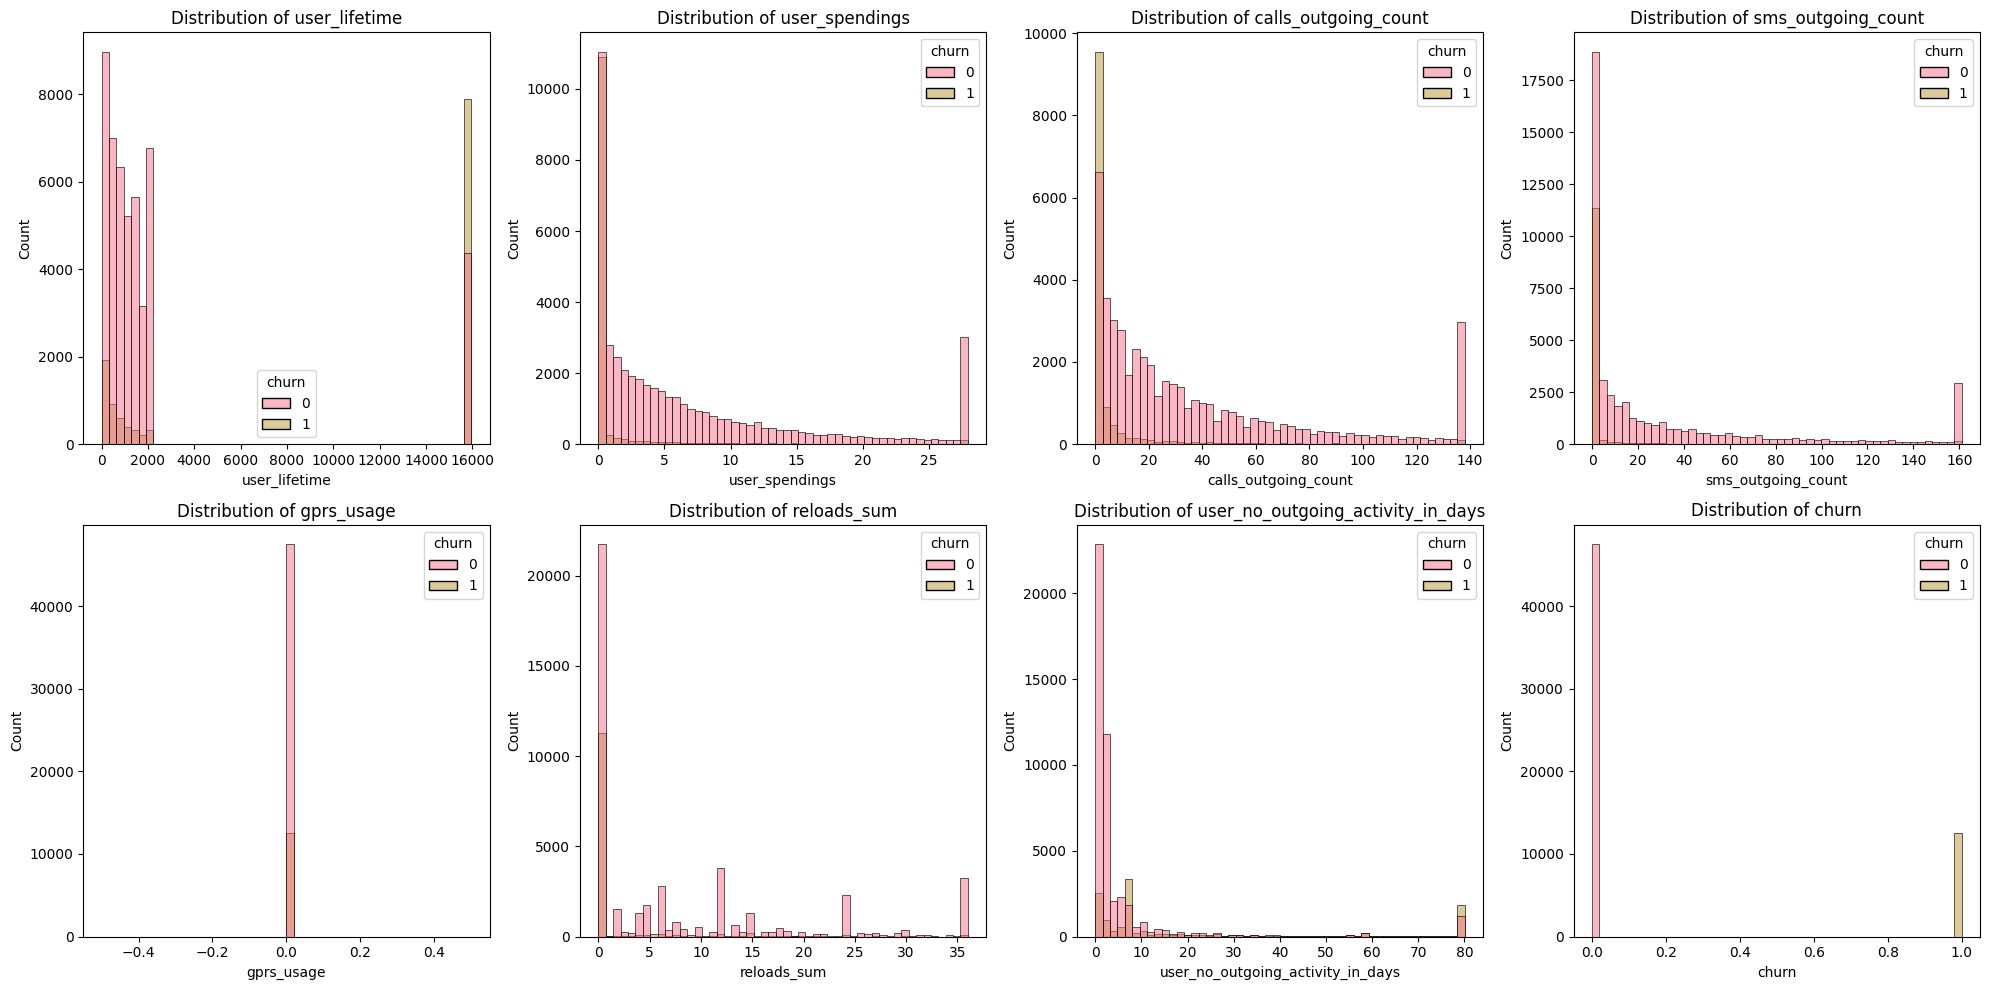

In [6]:
# DISTRIBUTION ANALYSIS OF KEY USAGE METRICS
usage_cols = [
    'user_lifetime', 'user_spendings', 'calls_outgoing_count',
    'sms_outgoing_count', 'gprs_usage', 'reloads_sum',
    'user_no_outgoing_activity_in_days', 'churn'
]
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, col in enumerate(usage_cols):
    sns.histplot(data=df, x=col, hue='churn', bins=50, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

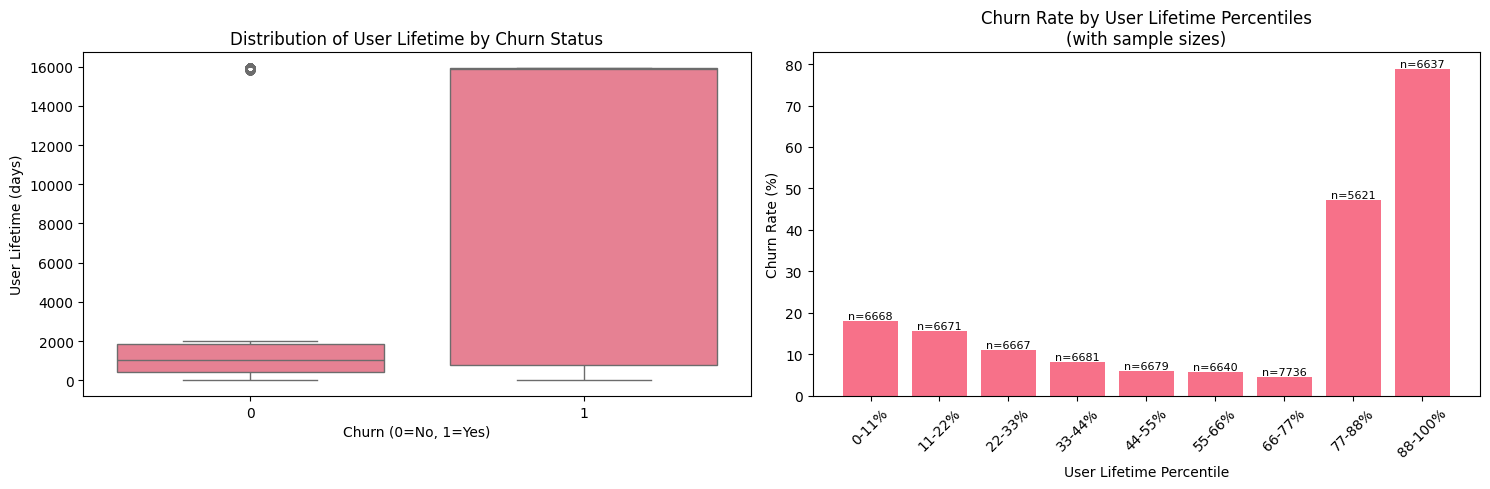

In [7]:
# USER LIFETIME ANALYSIS AND CHURN PATTERNS
plt.figure(figsize=(15, 5))

# BOXPLOT OF LIFETIME VS CHURN
plt.subplot(1, 2, 1)
sns.boxplot(x='churn', y='user_lifetime', data=df)
plt.title('Distribution of User Lifetime by Churn Status')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('User Lifetime (days)')

# CHURN RATE BY LIFETIME SEGMENTS
plt.subplot(1, 2, 2)
df['lifetime_bins'] = pd.qcut(df['user_lifetime'], q=9, duplicates='drop')
actual_bins = len(df['lifetime_bins'].cat.categories)
lifetime_labels = [f'{int(i * 100 / actual_bins)}-{int((i + 1) * 100 / actual_bins)}%' for i in range(actual_bins)]
df['lifetime_bins'] = df['lifetime_bins'].cat.rename_categories(lifetime_labels)

churn_by_lifetime = df.groupby('lifetime_bins')['churn'].agg(['count', 'mean'])
churn_by_lifetime['churn_rate'] = churn_by_lifetime['mean'] * 100

bars = plt.bar(range(len(churn_by_lifetime)), churn_by_lifetime['churn_rate'])
plt.title('Churn Rate by User Lifetime Percentiles\n(with sample sizes)')
plt.xlabel('User Lifetime Percentile')
plt.ylabel('Churn Rate (%)')
plt.xticks(range(len(churn_by_lifetime)), churn_by_lifetime.index, rotation=45)

for idx, bar in enumerate(bars):
    sample_size = churn_by_lifetime['count'][idx]
    plt.text(idx, bar.get_height(), f'n={sample_size}', 
             ha='center', va='bottom', rotation=0, fontsize=8)

plt.tight_layout()
plt.show()

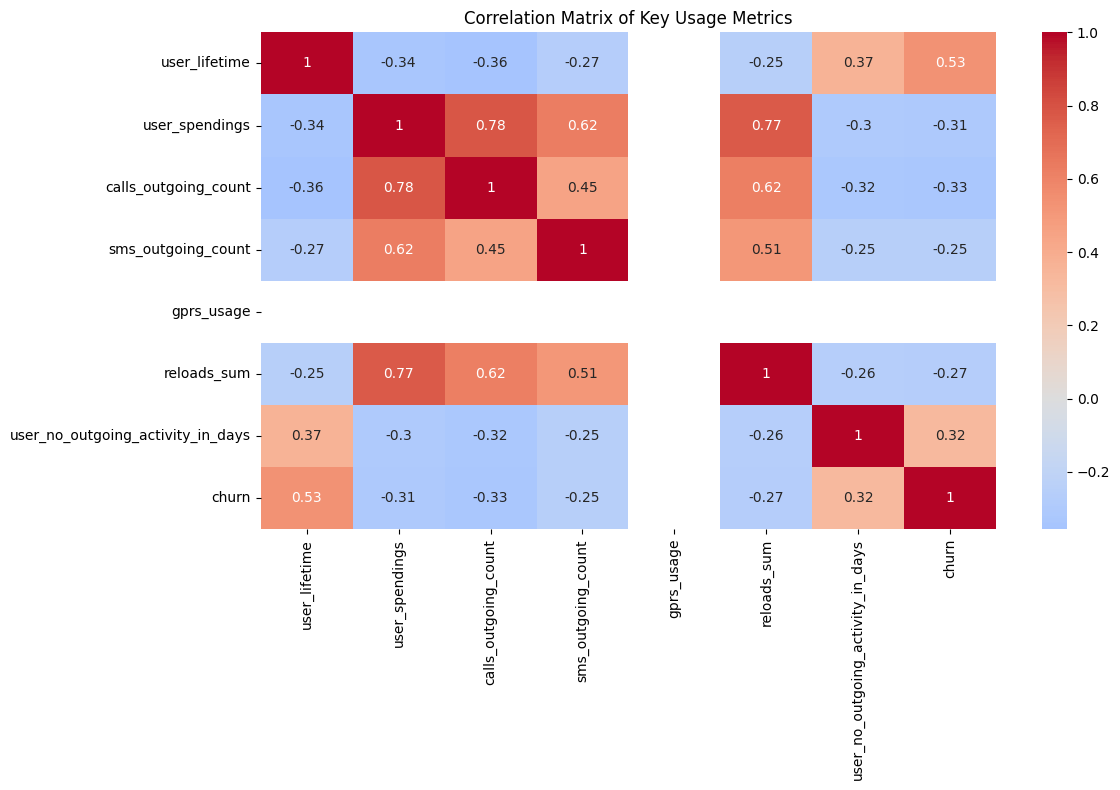

In [8]:
# KEY METRICS CORRELATION ANALYSIS
correlation = df[usage_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Usage Metrics')
plt.tight_layout()
plt.show()

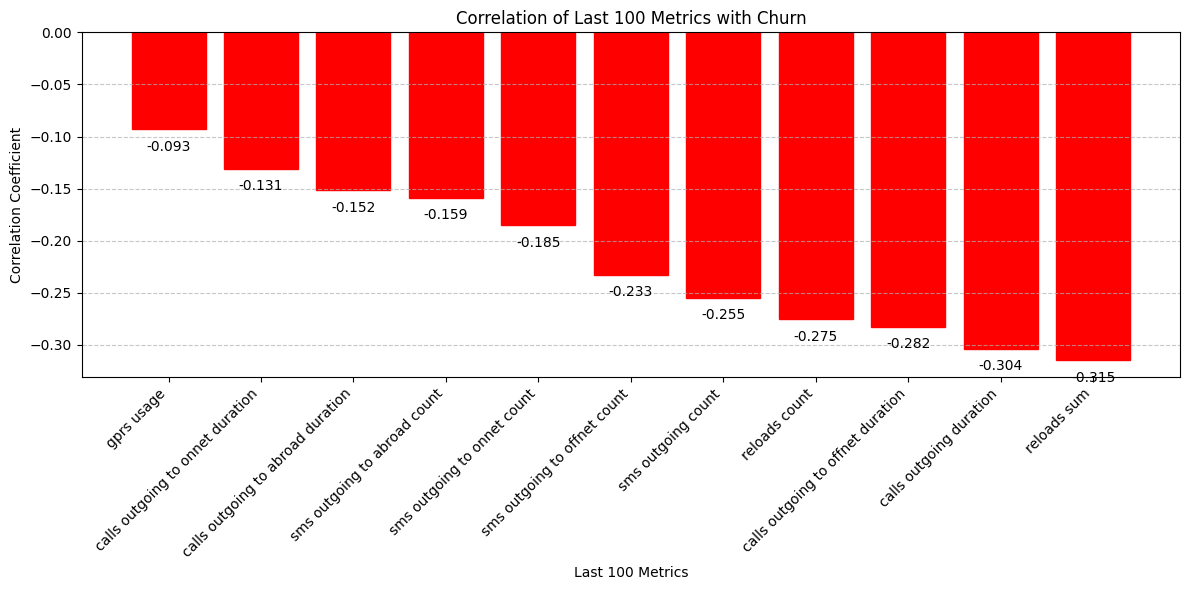

In [9]:
# LAST 100 EVENTS ANALYSIS AND CORRELATION WITH CHURN
last100_cols = [col for col in df.columns if 'last_100' in col]
churn_correlations = df[last100_cols + ['churn']].corr()['churn'].drop('churn')
sorted_correlations = churn_correlations.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(sorted_correlations)), sorted_correlations.values)

colors = ['red' if x < 0 else 'blue' for x in sorted_correlations.values]
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.title('Correlation of Last 100 Metrics with Churn')
plt.xlabel('Last 100 Metrics')
plt.ylabel('Correlation Coefficient')
plt.xticks(range(len(sorted_correlations)), 
           [col.replace('last_100_', '').replace('_', ' ') for col in sorted_correlations.index], 
           rotation=45, ha='right')

for i, v in enumerate(sorted_correlations.values):
    plt.text(i, v + (0.01 if v >= 0 else -0.01), 
             f'{v:.3f}', ha='center', va='bottom' if v >= 0 else 'top')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

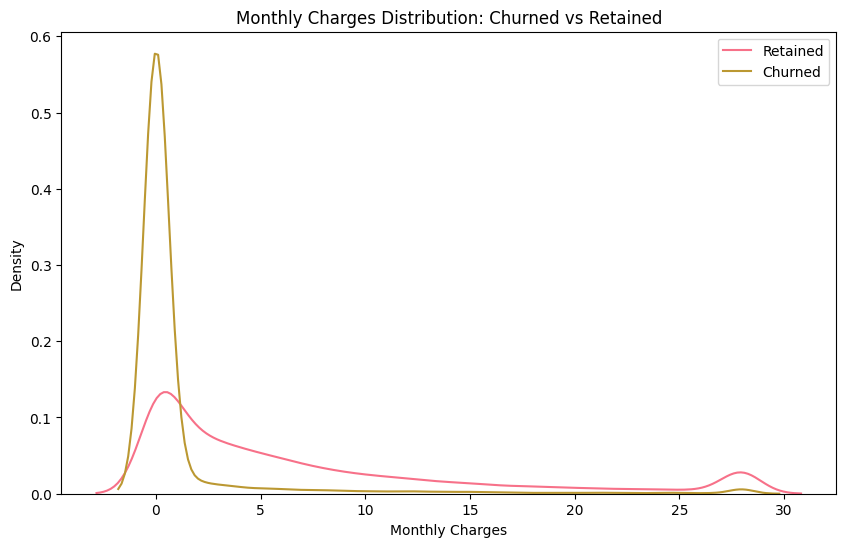

In [10]:
# SPENDING PATTERNS ANALYSIS: CHURNED VS RETAINED
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['churn']==0]['user_spendings'], label='Retained')
sns.kdeplot(data=df[df['churn']==1]['user_spendings'], label='Churned')
plt.title('Monthly Charges Distribution: Churned vs Retained')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()

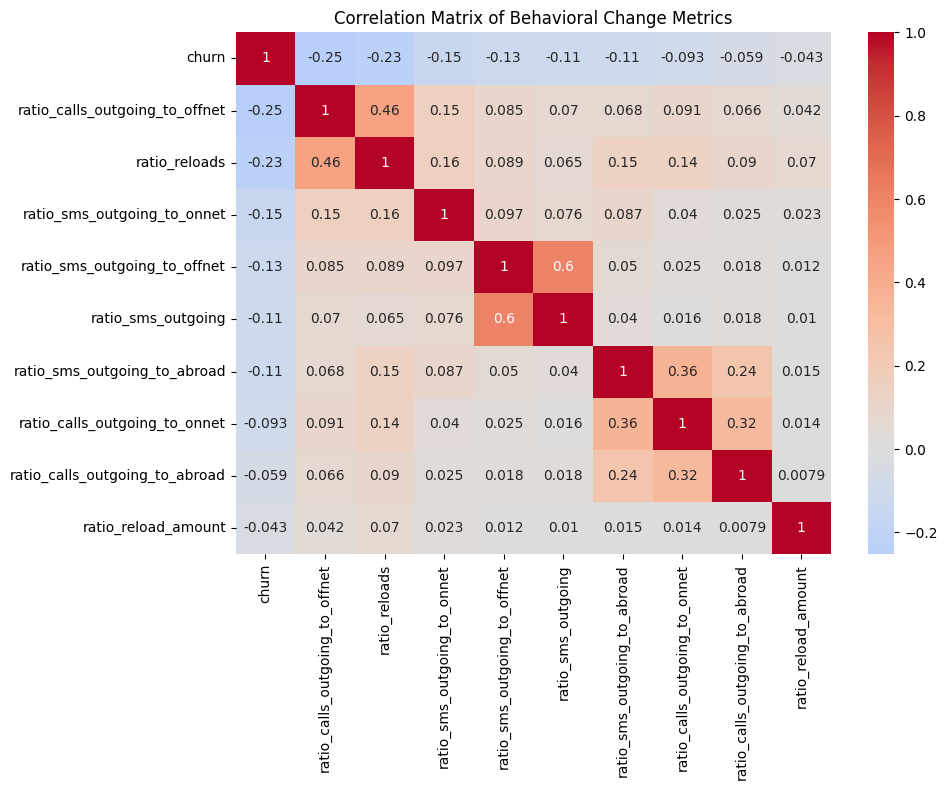

In [11]:
# BEHAVIORAL CHANGE ANALYSIS AND RECENCY RATIOS
def create_recency_ratios(df):
    # CALL METRICS - DURATION BASED
    call_metrics = {
        'calls_outgoing': 'duration',
        'calls_outgoing_to_onnet': 'duration',
        'calls_outgoing_to_offnet': 'duration',
        'calls_outgoing_to_abroad': 'duration'
    }
    
    # COUNT BASED METRICS
    count_metrics = [
        'sms_outgoing',
        'sms_outgoing_to_onnet',
        'sms_outgoing_to_offnet',
        'sms_outgoing_to_abroad',
        'reloads'
    ]
    
    ratios = {}
    
    # CALL DURATION RATIOS
    for base_name, metric_type in call_metrics.items():
        last100_dur = df[f'last_100_{base_name}_{metric_type}']
        total_dur = df[f'{base_name}_{metric_type}']
        total_count = df[f'{base_name}_count']
        
        avg_recent = last100_dur / 100
        avg_month = np.where(total_count > 0, total_dur / total_count, 0)
        ratios[f'ratio_{base_name}'] = np.where(avg_month > 0, avg_recent / avg_month, 0)
    
    # COUNT BASED RATIOS
    for base_name in count_metrics:
        last100_count = df[f'last_100_{base_name}_count']
        total_count = df[f'{base_name}_count']
        
        rate_recent = last100_count / 100
        rate_month = total_count / 30
        ratios[f'ratio_{base_name}'] = np.where(rate_month > 0, rate_recent / rate_month, 0)
    
    # RELOAD AMOUNT RATIOS
    last100_amount = df['last_100_reloads_sum'] / df['last_100_reloads_count'].clip(1)
    month_amount = df['reloads_sum'] / df['reloads_count'].clip(1)
    ratios['ratio_reload_amount'] = np.where(month_amount > 0, last100_amount / month_amount, 0)
    
    return pd.DataFrame(ratios)

ratio_df = create_recency_ratios(df)
ratio_df['churn'] = df['churn']

mean_ratios = ratio_df.groupby('churn').mean()

top_ratios = ratio_df.corr()['churn'].abs().nlargest(10).index
plt.figure(figsize=(10, 8))
sns.heatmap(ratio_df[top_ratios].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Behavioral Change Metrics')
plt.tight_layout()
plt.show()

## Feature Engineering

In [12]:
# FEATURE ENGINEERING
def create_features(df):
    df_features = df.copy()
    
    # USER PROFILE FEATURES
    df_features['is_new_user'] = df['user_lifetime'] <= 90
    df_features['inactive_ratio'] = df['user_no_outgoing_activity_in_days'] / df['user_lifetime'].clip(lower=1)
    
    # FINANCIAL BEHAVIOR
    df_features['avg_daily_spend'] = df['user_spendings'] / df['user_lifetime'].clip(lower=1)
    df_features['reload_frequency'] = df['reloads_count'] / df['user_lifetime'].clip(lower=1)
    df_features['avg_reload_amount'] = df['reloads_sum'] / df['reloads_count'].replace(0, 1)
    df_features['balance_ratio'] = df['user_account_balance_last'] / df['reloads_sum'].replace(0, 1)
    
    # USAGE PATTERNS - CALLS
    total_calls = df['calls_outgoing_count'].replace(0, 1)
    df_features['calls_onnet_ratio'] = df['calls_outgoing_to_onnet_count'] / total_calls
    df_features['calls_offnet_ratio'] = df['calls_outgoing_to_offnet_count'] / total_calls
    df_features['calls_abroad_ratio'] = df['calls_outgoing_to_abroad_count'] / total_calls
    
    # USAGE PATTERNS - SMS
    total_sms = df['sms_outgoing_count'].replace(0, 1)
    df_features['sms_onnet_ratio'] = df['sms_outgoing_to_onnet_count'] / total_sms
    df_features['sms_offnet_ratio'] = df['sms_outgoing_to_offnet_count'] / total_sms
    df_features['sms_abroad_ratio'] = df['sms_outgoing_to_abroad_count'] / total_sms
    
    # SERVICE MIX FEATURES
    total_services = (df['calls_outgoing_count'] + df['sms_outgoing_count'] + 
                     df['gprs_session_count']).replace(0, 1)
    df_features['calls_share'] = df['calls_outgoing_count'] / total_services
    df_features['sms_share'] = df['sms_outgoing_count'] / total_services
    df_features['gprs_share'] = df['gprs_session_count'] / total_services
    
    # BEHAVIORAL CHANGE INDICATORS
    df_features['calls_trend'] = (df['last_100_calls_outgoing_duration'] / 
                                 df['calls_outgoing_duration'].replace(0, 1)).clip(0, 1)
    df_features['sms_trend'] = (df['last_100_sms_outgoing_count'] / 
                               df['sms_outgoing_count'].replace(0, 1)).clip(0, 1)
    df_features['reload_trend'] = (df['last_100_reloads_count'] / 
                                  df['reloads_count'].replace(0, 1)).clip(0, 1)
    
    return df_features

In [13]:
df_model = create_features(df)

# Modeling

In [14]:
# PREPARE MODELING DATA
X = df_model.drop(columns=['churn', 'lifetime_bins'])
y = df_model['churn']

In [15]:
# MODEL SETUP AND DATA PREPROCESSING
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [16]:
# MODEL HYPERPARAMETER TUNING
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [8, 10],
    'min_samples_leaf': [20, 50],
}

grid_search = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train_resampled)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'min_samples_leaf': [20, 50],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

### Evaluation

In [17]:
# MODEL EVALUATION
y_pred = grid_search.predict(X_test_scaled)
y_prob = grid_search.predict_proba(X_test_scaled)[:, 1]

print("\nBest Parameters:", grid_search.best_params_)
print("\nModel Performance:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.3f}")

precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.3f}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 20, 'n_estimators': 200}

Model Performance:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      9490
           1       0.63      0.77      0.69      2510

    accuracy                           0.86     12000
   macro avg       0.78      0.83      0.80     12000
weighted avg       0.87      0.86      0.86     12000

ROC-AUC Score: 0.902
Precision-Recall AUC: 0.751


### Feature Importance

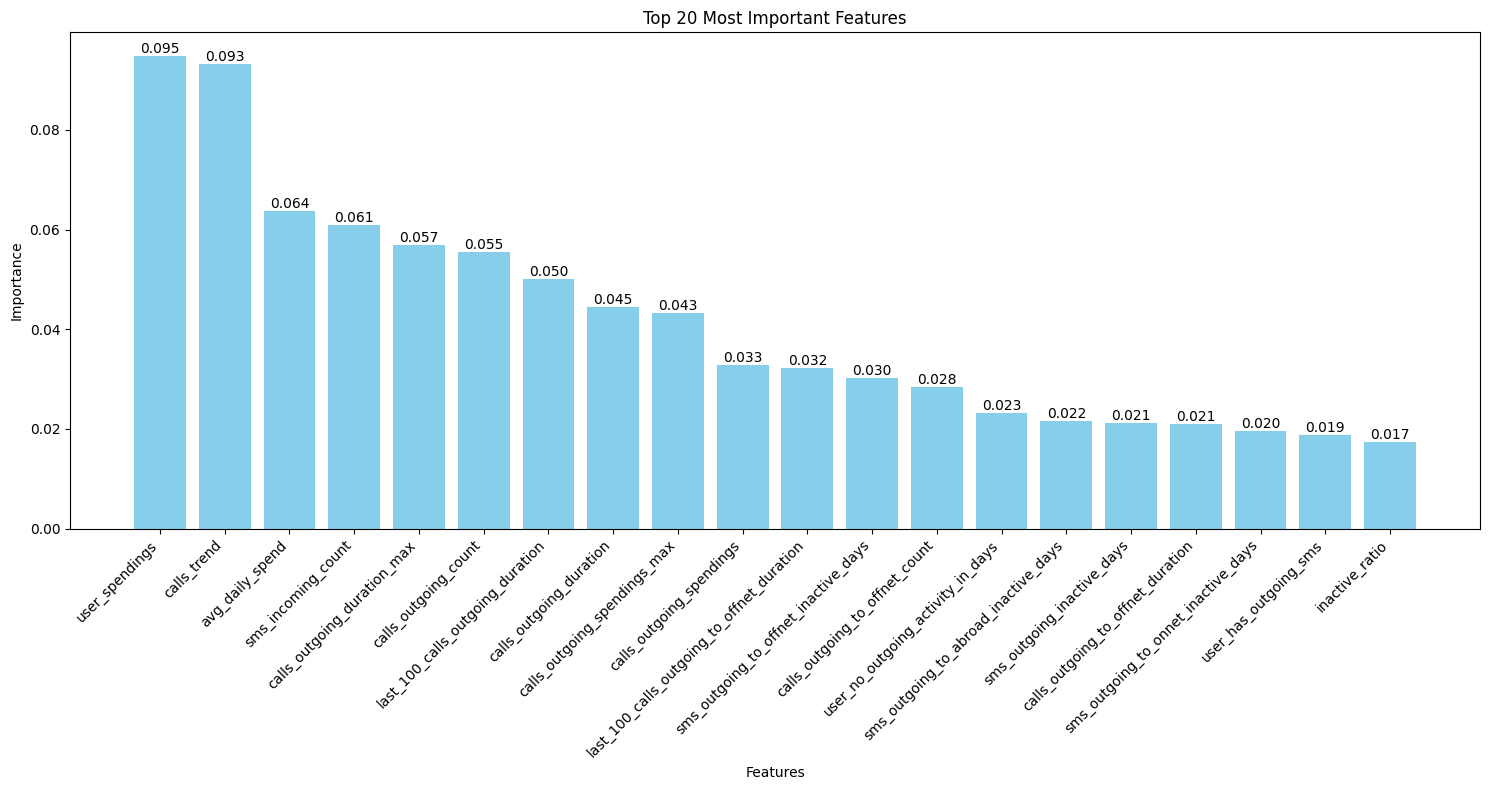

In [18]:
# FEATURE IMPORTANCE VISUALIZATION
def plot_feature_importance(model, feature_names):
    importances = model.best_estimator_.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    top_n = 20
    top_indices = indices[:top_n]
    top_importances = importances[top_indices]
    top_features = [feature_names[i] for i in top_indices]
    
    plt.figure(figsize=(15, 8))
    bars = plt.bar(range(top_n), top_importances, color='skyblue')
    plt.title(f"Top {top_n} Most Important Features")
    plt.xlabel("Features")
    plt.ylabel("Importance")
    
    plt.xticks(range(top_n), top_features, rotation=45, ha='right')
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.3f}',
                 ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

plot_feature_importance(grid_search, X.columns)

### Probability Predictions

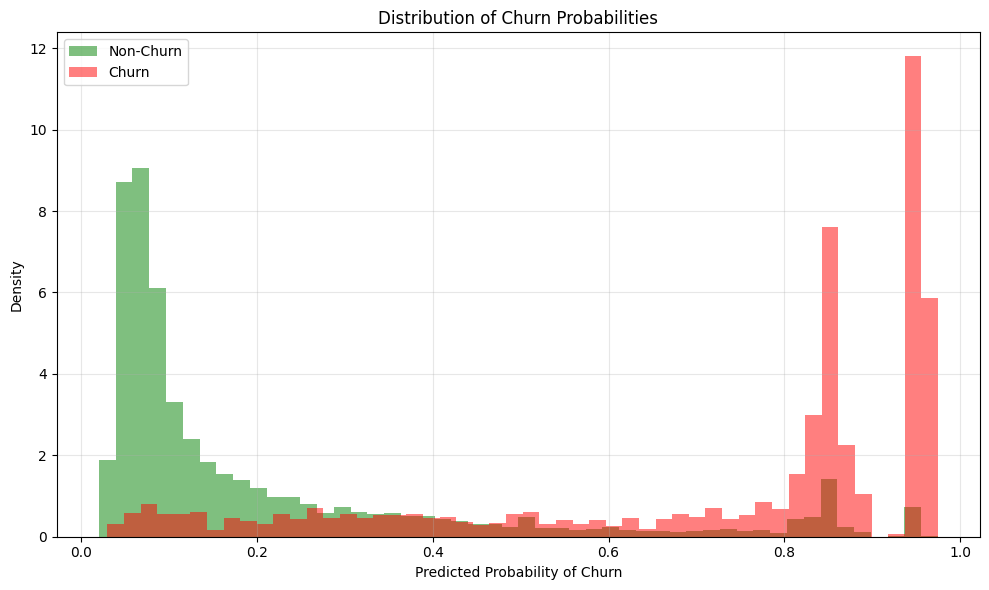

In [19]:
# PREDICTION DISTRIBUTION ANALYSIS
def analyze_predictions(y_test, y_prob):
    plt.figure(figsize=(10, 6))
    
    plt.hist(y_prob[y_test == 0], bins=50, alpha=0.5, 
             label='Non-Churn', density=True, color='green')
    plt.hist(y_prob[y_test == 1], bins=50, alpha=0.5, 
             label='Churn', density=True, color='red')
    
    plt.xlabel('Predicted Probability of Churn')
    plt.ylabel('Density')
    plt.title('Distribution of Churn Probabilities')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

analyze_predictions(y_test, y_prob)

In [20]:
# MODEL PERSISTENCE
import pickle

model_filename = 'models/churn_prediction_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(grid_search, file)

scaler_filename = 'models/feature_scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)